# Set Up

In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

**Load enriched csv file from previous notebook**

In [42]:
# reading clean and enriched dataframe from EDA notebook
df = pd.read_csv('Data/enriched_df.csv')

# Set Display options
pd.set_option('display.max_columns', None)

In [43]:
df

,circuit_number,circuit_name,outage_date,season,outage_cause_code,outage_cause,outage_duration,customers_affected,cmi,voltage,region,customer_count,circuit_miles,percent_overhead,percent_underground,saidi_2023,saidi_2024,saidi_diff_from_prev_year,saifi_2023,saifi_2024,saifi_diff_from_prev_year,total_outage_time_2024,total_outages_2024
0,1,Orange,2024-01-05,Winter,8,Other,837,376,314712,4,Coastal,1299,45,90,10,1.68,1.94,0.26,0.002,0.002,0.000,2521,3
1,1,Orange,2024-08-27,Summer,3,Weather,515,1299,668985,4,Coastal,1299,45,90,10,1.68,1.94,0.26,0.002,0.002,0.000,2521,3
2,1,Orange,2024-11-10,Fall,4,Third Party,1169,862,1007678,4,Coastal,1299,45,90,10,1.68,1.94,0.26,0.002,0.002,0.000,2521,3
3,2,Alabama,2024-03-13,Spring,1,UG Equipment Failure,227,1399,317573,12,North,3447,29,82,18,0.57,0.60,0.03,0.001,0.001,0.000,2073,4
4,2,Alabama,2024-03-15,Spring,1,UG Equipment Failure,19,3198,60762,12,North,3447,29,82,18,0.57,0.60,0.03,0.001,0.001,0.000,2073,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21,Dinan,2024-04-14,Spring,7,OH Equipment Failure,758,2475,1876050,12,Coastal,2600,109,55,45,2.09,1.92,-0.17,0.001,0.003,0.002,4994,7
96,21,Dinan,2024-04-24,Spring,4,Third Party,727,1043,758261,12,Coastal,2600,109,55,45,2.09,1.92,-0.17,0.001,0.003,0.002,4994,7
97,21,Dinan,2024-05-28,Spring,1,UG Equipment Failure,31,2562,79422,12,Coastal,2600,109,55,45,2.09,1.92,-0.17,0.001,0.003,0.002,4994,7
98,21,Dinan,2024-07-29,Summer,4,Third Party,1221,644,786324,12,Coastal,2600,109,55,45,2.09,1.92,-0.17,0.001,0.003,0.002,4994,7


# High Level Overview

### Outages per Month – 2024

This line plot shows how many outage events occurred each month in 2024. Peaks in April and May suggest a higher frequency of disruptions during the spring season, potentially tied to weather or infrastructure stress.


/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/4044577405.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_outage_counts = df.groupby('outage_month').size().reset_index(name='outage_count')


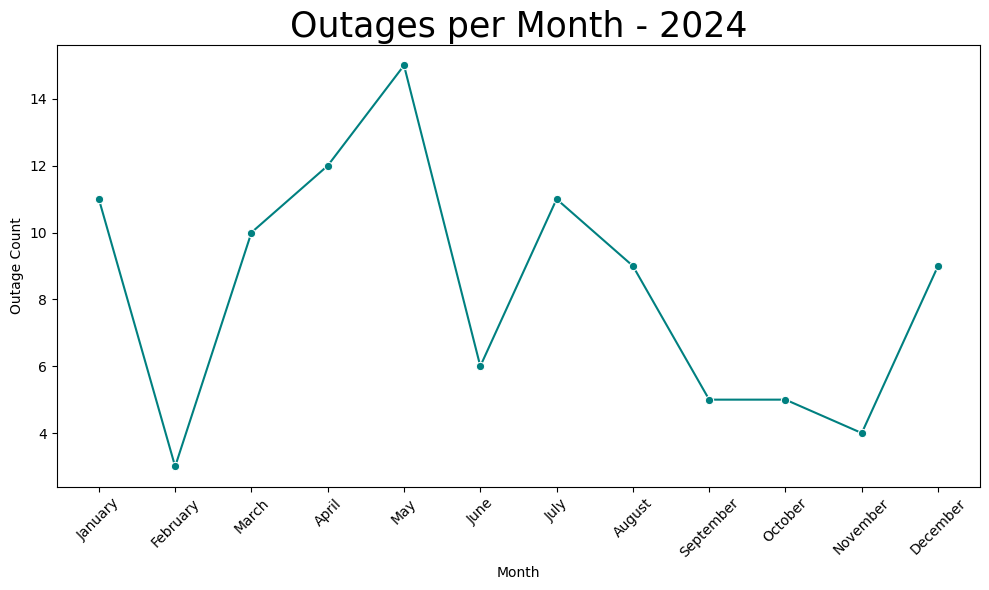

In [91]:
df['outage_month'] = pd.to_datetime(df['outage_date']).dt.month_name()

# Create categorical month order for proper sorting
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['outage_month'] = pd.Categorical(df['outage_month'], categories=month_order, ordered=True)

# Group by month and count outages
monthly_outage_counts = df.groupby('outage_month').size().reset_index(name='outage_count')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=monthly_outage_counts,
    x='outage_month',
    y='outage_count',
    marker='o',
    color='teal'  # <-- pick a non-default color here
)
plt.title('Outages per Month - 2024', fontsize=25)
plt.xlabel('Month')
plt.ylabel('Outage Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Total CMI per Month – 2024

This chart displays the total customer minutes of interruption (CMI) for each month. July stands out with the highest total CMI, indicating that outages during this month were particularly long or affected a large number of customers.

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/63383397.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cmi = df.groupby('outage_month')['cmi'].sum().reset_index()


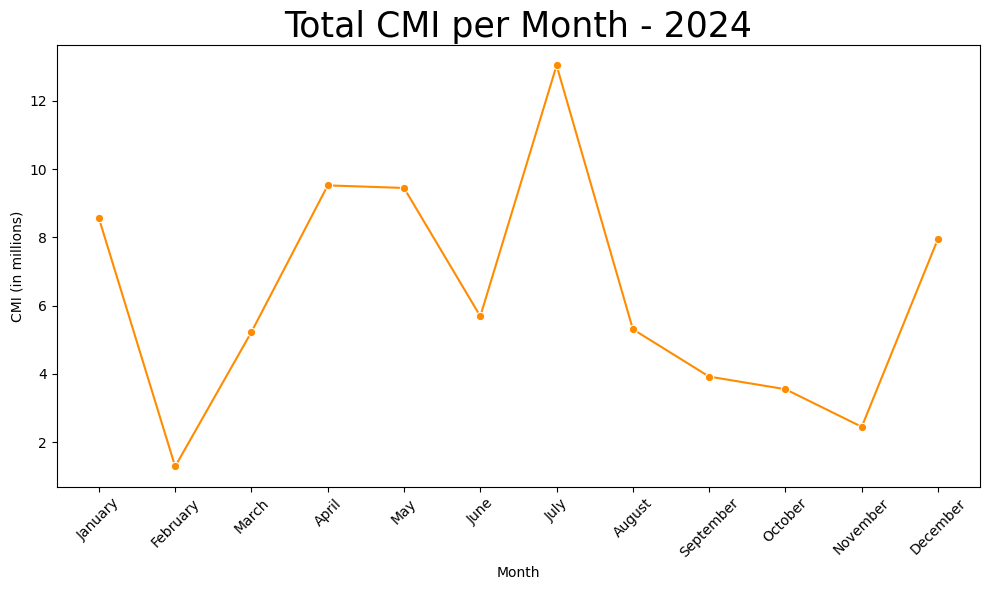

In [93]:
df['outage_month'] = pd.to_datetime(df['outage_date']).dt.month_name()

# Set month order for proper x-axis order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['outage_month'] = pd.Categorical(df['outage_month'], categories=month_order, ordered=True)

# Group by month and sum CMI
monthly_cmi = df.groupby('outage_month')['cmi'].sum().reset_index()
monthly_cmi['cmi'] = monthly_cmi['cmi'] / 1_000_000  # Scale to millions

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_cmi, x='outage_month', y='cmi', marker='o', color='darkorange')
plt.title('Total CMI per Month - 2024', fontsize=25)
plt.xlabel('Month')
plt.ylabel('CMI (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Total CMI by Season – 2024

This bar plot aggregates CMI by season. Spring and Summer account for the highest total CMI, which may indicate a seasonal vulnerability due to increased load, heat-related stress on infrastructure, or vegetation contact.


/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/2583764736.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


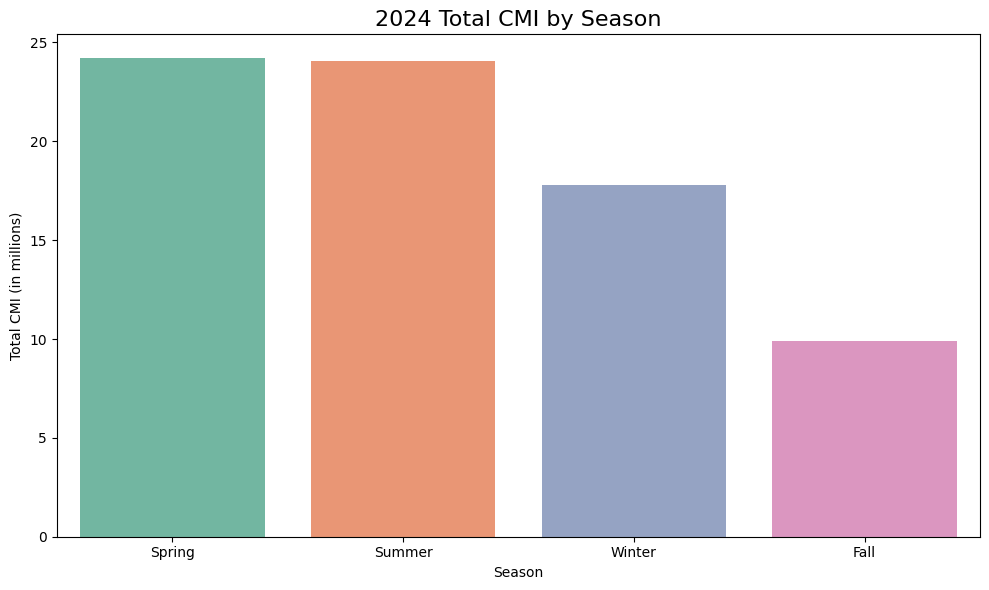

In [88]:
season_cmi = (
    df.groupby('season')['cmi']
    .sum()
    .reset_index()
)

# Scale CMI to millions
season_cmi['cmi'] = season_cmi['cmi'] / 1_000_000

# Sort seasons by total CMI descending
season_cmi = season_cmi.sort_values(by='cmi', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=season_cmi,
    x='season',
    y='cmi',
    palette='Set2'
)

plt.title("2024 Total CMI by Season", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Total CMI (in millions)")
plt.tight_layout()
plt.show()


### Outages by Cause – 2024

This plot shows the most frequently reported causes of outages in 2024. Equipment failure (both underground and overhead) is the leading cause, followed by third-party damage and weather-related incidents.


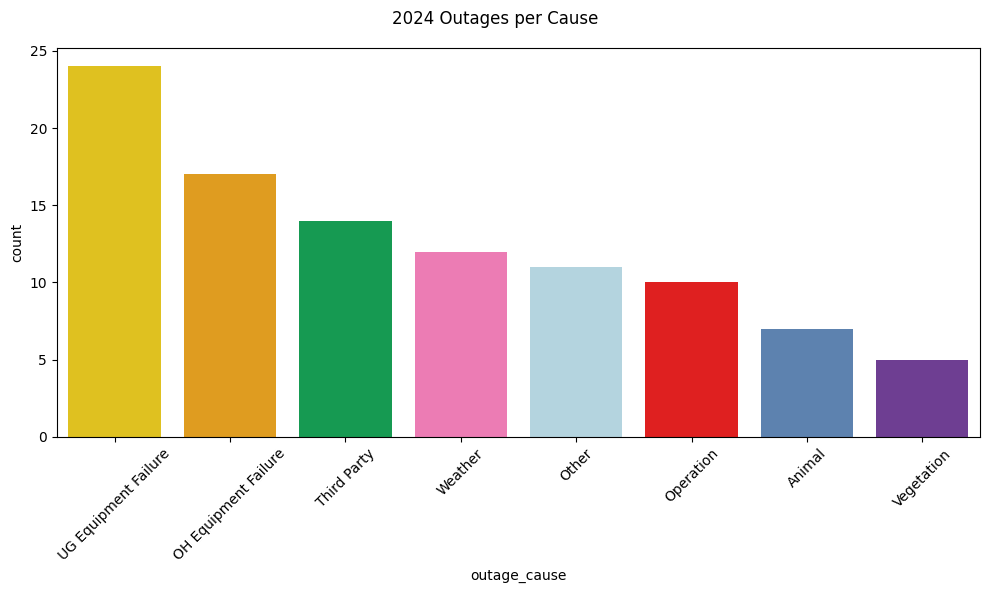

In [103]:
# top outage causes 

top_outage_causes_2024 = (
    df
    .groupby("outage_cause")
    .size()
    .reset_index(name="count")
    .sort_values(by='outage_cause', ascending = True)
    .reset_index(drop=True)
)

# top_outage_causes_2024

plt.figure(figsize=(10,6))

sns.barplot(top_outage_causes_2024.sort_values(by='count', ascending=False), x = 'outage_cause', y = 'count', hue = 'outage_cause', palette = cause_colors, legend=False)
plt.suptitle("2024 Outages per Cause")
plt.tick_params(rotation = 45, axis = 'x')
plt.tight_layout()

<b> Overview of outages and minutes interrupted by region.

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/1446971635.py:5: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/1446971635.py:19: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(


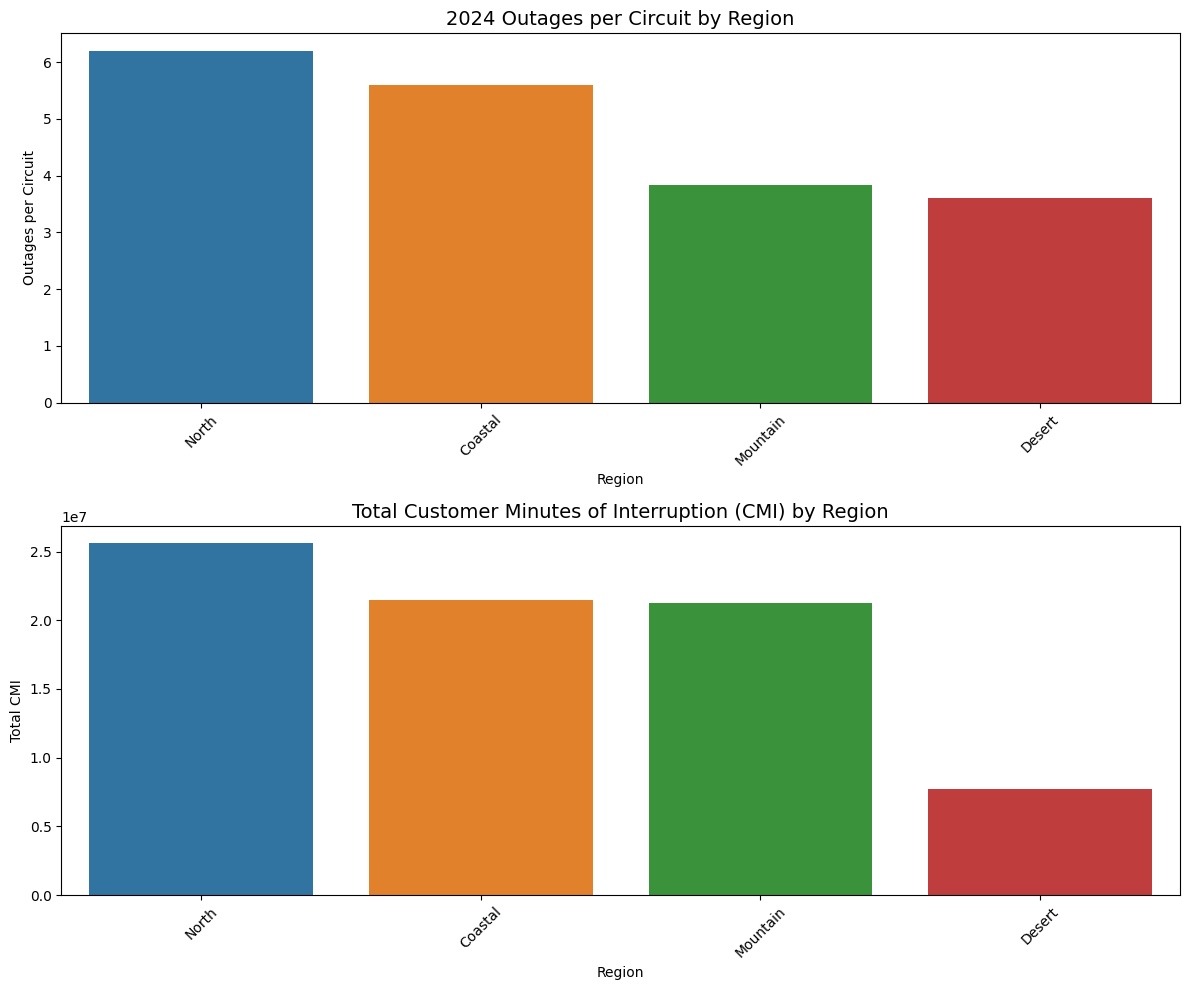

In [68]:

palette = sns.color_palette(palette = 'tab10')
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Circuit outages per Region
sns.barplot(
    data=outages_per_region_2024,
    x='region',
    y='outages_per_circuit',
    hue='region',
    ax = axs[0],
    palette=palette  
)
axs[0].set_title('2024 Outages per Circuit by Region', fontsize=14)
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Outages per Circuit')
axs[0].tick_params(axis = 'x', rotation = 45)

# Total Cmi Per Region
sns.barplot(
    data = total_cmi_per_region,
    x = 'region',
    y = 'total_cmi',
    hue = 'region',
    ax=axs[1],
    palette = palette
)

axs[1].set_title('Total Customer Minutes of Interruption (CMI) by Region', fontsize=14)
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Total CMI')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Summary of Key Insights

- Outages occurred most frequently during spring and were most impactful in the summer.
- Equipment failures were the primary cause of outages.
- The North region had the highest overall outage frequency and customer impact.
- July had the highest CMI despite not having the highest outage count, suggesting longer or more widespread outages.

These findings can support planning decisions for maintenance schedules, infrastructure upgrades, and seasonal risk mitigation.

# Regional Reliability Breakdown

This section focuses on comparing reliability metrics across different geographic regions. Each subplot below explores outage severity, frequency, and cause distribution at the circuit level, providing insight into which circuits or regions are most impacted.

### Total Customer Minutes of Interruption (CMI) per Circuit by Region – 2024

This set of plots shows the total CMI for the top circuits in each region. CMI reflects the aggregate time customers were without service. Higher values indicate either long outages or a high number of customers impacted.

- In the Mountain and Northern regions, certain circuits (e.g., "Magenta" and "Logan") dominate the CMI burden.
- The Coastal and Desert regions have more moderate and evenly distributed CMI across circuits.


/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/1872715586.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coastal_cmi, x='circuit_name', y='cmi', palette='crest', ax=axs[0][0])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/1872715586.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=desert_cmi, x='circuit_name', y='cmi', palette='rocket', ax=axs[0][1])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/1872715586.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mounta

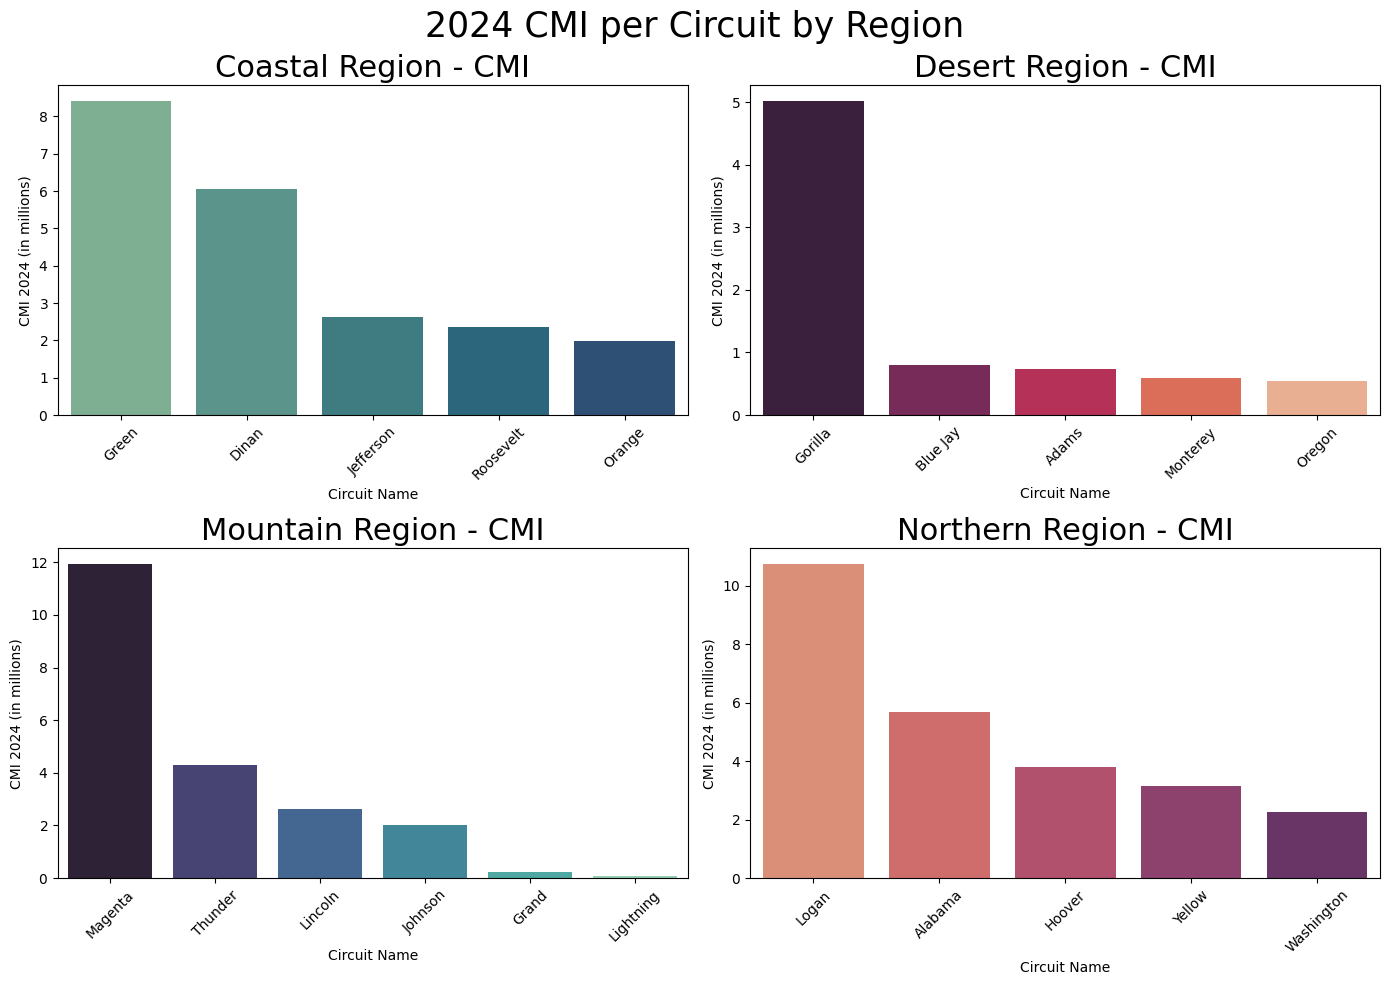

In [45]:
df_sorted = df.sort_values(by='circuit_name')

# Filter by region
coastal = df_sorted[df_sorted['region'] == 'Coastal']
desert = df_sorted[df_sorted['region'] == 'Desert']
mountain = df_sorted[df_sorted['region'] == 'Mountain']
north = df_sorted[df_sorted['region'] == 'North']

# Group by circuit and sum CMI, sorted descending
coastal_cmi = coastal.groupby('circuit_name')['cmi'].sum().reset_index().sort_values(by='cmi', ascending=False)
desert_cmi = desert.groupby('circuit_name')['cmi'].sum().reset_index().sort_values(by='cmi', ascending=False)
mountain_cmi = mountain.groupby('circuit_name')['cmi'].sum().reset_index().sort_values(by='cmi', ascending=False)
north_cmi = north.groupby('circuit_name')['cmi'].sum().reset_index().sort_values(by='cmi', ascending=False)

# Scale to millions
for region_df in [coastal_cmi, desert_cmi, mountain_cmi, north_cmi]:
    region_df['cmi'] = region_df['cmi'] / 1_000_000

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Coastal - Crest
sns.barplot(data=coastal_cmi, x='circuit_name', y='cmi', palette='crest', ax=axs[0][0])
axs[0][0].set_title('Coastal Region - CMI', fontsize=22)
axs[0][0].tick_params(rotation=45, axis='x')
axs[0][0].set_xlabel("Circuit Name")

# Desert - Rocket
sns.barplot(data=desert_cmi, x='circuit_name', y='cmi', palette='rocket', ax=axs[0][1])
axs[0][1].set_title('Desert Region - CMI', fontsize=22)
axs[0][1].tick_params(rotation=45, axis='x')
axs[0][1].set_xlabel("Circuit Name")

# Mountain - Mako
sns.barplot(data=mountain_cmi, x='circuit_name', y='cmi', palette='mako', ax=axs[1][0])
axs[1][0].set_title('Mountain Region - CMI', fontsize=22)
axs[1][0].tick_params(rotation=45, axis='x')
axs[1][0].set_xlabel("Circuit Name")

# Northern - Flare
sns.barplot(data=north_cmi, x='circuit_name', y='cmi', palette='flare', ax=axs[1][1])
axs[1][1].set_title('Northern Region - CMI', fontsize=22)
axs[1][1].tick_params(rotation=45, axis='x')
axs[1][1].set_xlabel("Circuit Name")

# Final formatting
plt.suptitle('2024 CMI per Circuit by Region', fontsize=25)
y_label = "CMI 2024 (in millions)"
for ax in axs.flat:
    ax.set_ylabel(y_label)
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='plain', axis='y')  # disable scientific notation

plt.tight_layout()
plt.show()

### Outage Count per Circuit by Region – 2024

These plots show how frequently each circuit experienced outages. Unlike CMI, this metric captures the number of discrete outage events, regardless of severity.

- Circuits like "Roosevelt" and "Gorilla" appear with high outage frequencies.
- Some circuits (e.g., "Magenta" in Mountain) are both frequent and high-impact, suggesting a need for targeted intervention.


/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/1184455469.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coastal, x='circuit_name', y='outage_count', palette='crest', ax=axs[0][0])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/1184455469.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=desert, x='circuit_name', y='outage_count', palette='rocket', ax=axs[0][1])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/1184455469.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(d

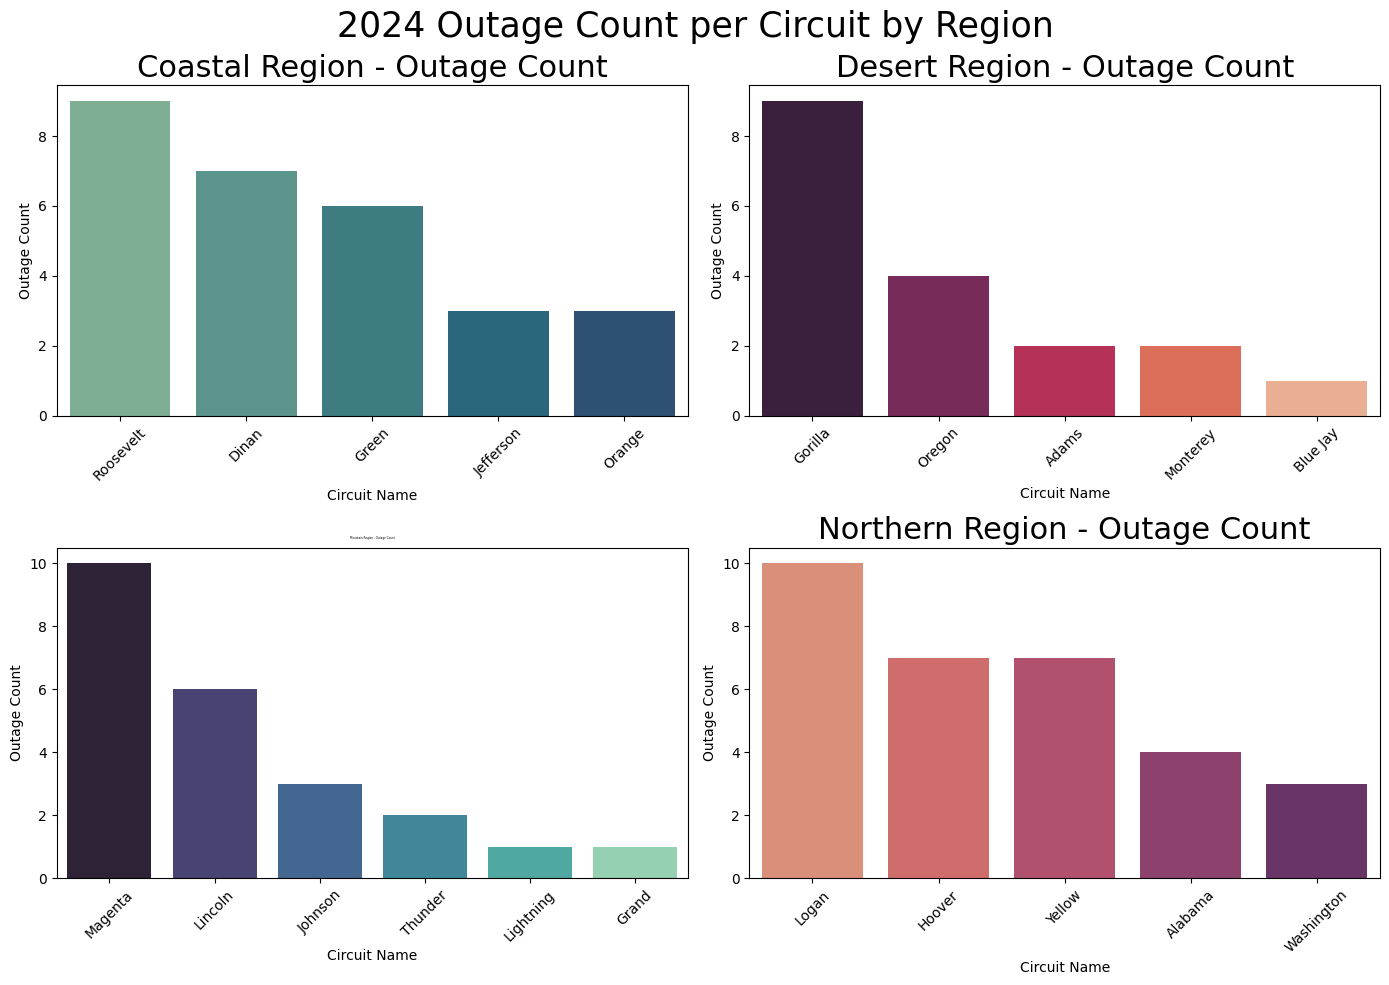

In [46]:
outage_counts = df['circuit_name'].value_counts().reset_index()
outage_counts.columns = ['circuit_name', 'outage_count']

# Merge with region info from the df
df_sorted = df.sort_values(by='circuit_name')
circuit_regions = df[['circuit_name', 'region']].drop_duplicates()
outage_counts = outage_counts.merge(circuit_regions, on='circuit_name', how='left')

# Filter by region
coastal = outage_counts[outage_counts['region'] == 'Coastal']
desert = outage_counts[outage_counts['region'] == 'Desert']
mountain = outage_counts[outage_counts['region'] == 'Mountain']
north = outage_counts[outage_counts['region'] == 'North']

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Coastal - Crest palette
sns.barplot(data=coastal, x='circuit_name', y='outage_count', palette='crest', ax=axs[0][0])
axs[0][0].set_title('Coastal Region - Outage Count', fontsize=22)
axs[0][0].tick_params(rotation=45, axis='x')
axs[0][0].set_xlabel("Circuit Name")
axs[0][0].set_ylabel("Outage Count")

# Desert - Rocket palette
sns.barplot(data=desert, x='circuit_name', y='outage_count', palette='rocket', ax=axs[0][1])
axs[0][1].set_title('Desert Region - Outage Count', fontsize=22)
axs[0][1].tick_params(rotation=45, axis='x')
axs[0][1].set_xlabel("Circuit Name")
axs[0][1].set_ylabel("Outage Count")

# Mountain - Mako palette
sns.barplot(data=mountain, x='circuit_name', y='outage_count', palette='mako', ax=axs[1][0])
axs[1][0].set_title('Mountain Region - Outage Count', fontsize=2)
axs[1][0].tick_params(rotation=45, axis='x')
axs[1][0].set_xlabel("Circuit Name")
axs[1][0].set_ylabel("Outage Count")

# Northern - Magma palette
sns.barplot(data=north, x='circuit_name', y='outage_count', palette='flare', ax=axs[1][1])
axs[1][1].set_title('Northern Region - Outage Count', fontsize=22)
axs[1][1].tick_params(rotation=45, axis='x')
axs[1][1].set_xlabel("Circuit Name")
axs[1][1].set_ylabel("Outage Count")

# Final layout
plt.suptitle('2024 Outage Count per Circuit by Region', fontsize=25)
plt.tight_layout()
plt.show()

### Most Common Outage Causes by Region – 2024

This set of bar plots displays the top outage causes by region, based on total outage event counts for each category.

- In the **Coastal region**, underground equipment failure was the dominant cause of outages in 2024.
- The **Desert region** had a more even distribution across equipment, weather, and miscellaneous causes.
- The **Mountain region** saw a high proportion of third-party and overhead equipment failure incidents.
- The **North region** was impacted by both underground and overhead equipment issues, with significant operational and animal-related outages as well.

These patterns can help prioritize region-specific mitigation strategies, such as vegetation management, infrastructure upgrades, or third-party risk control.


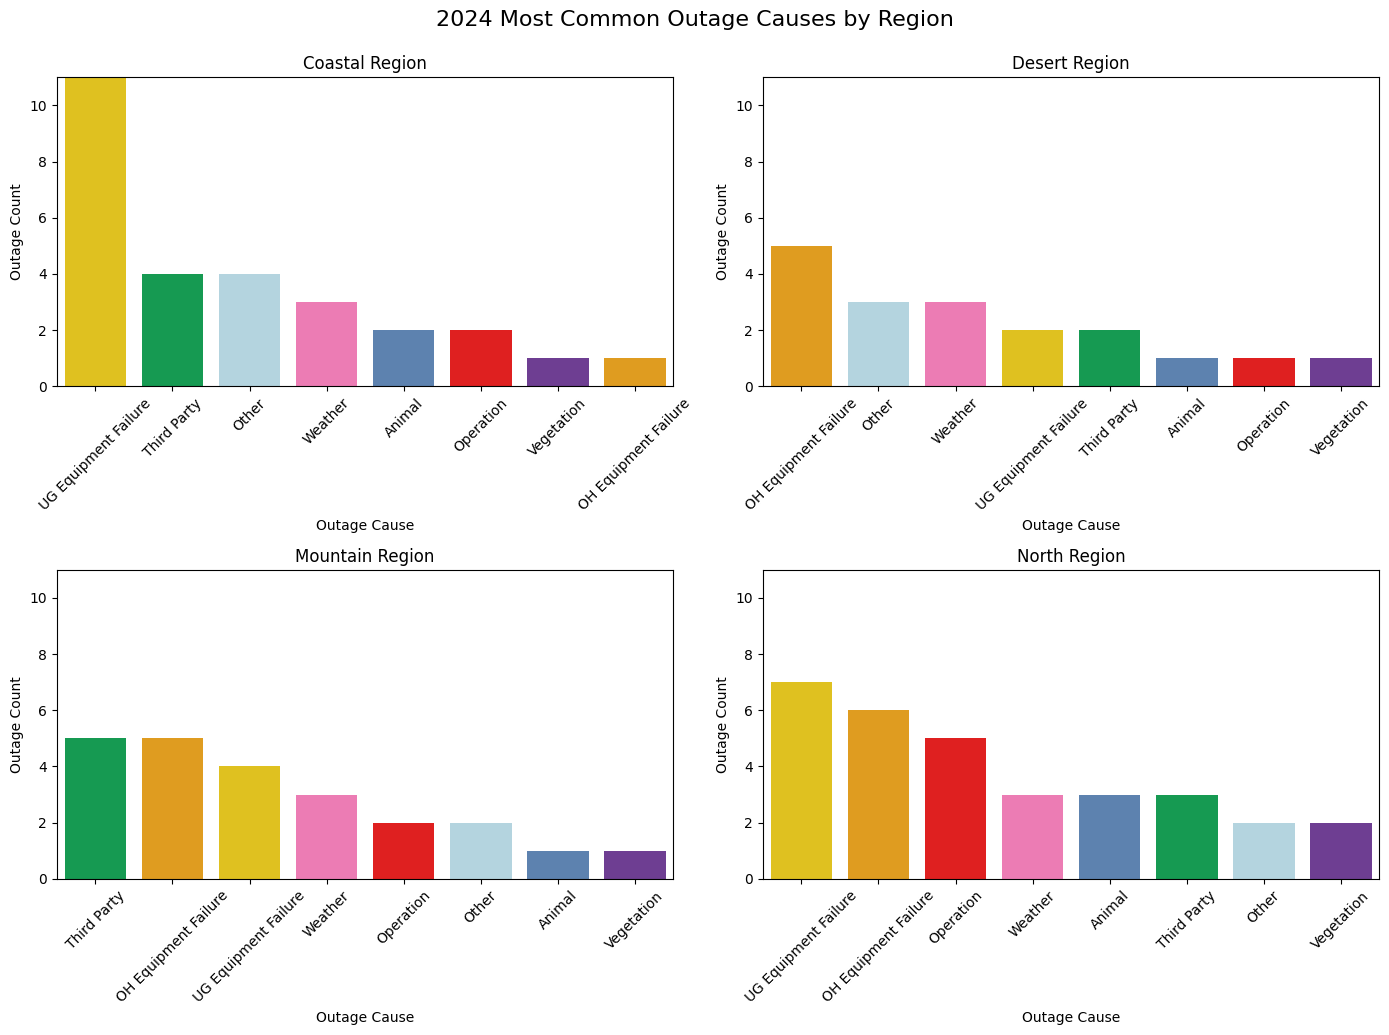

In [73]:
# histograms for most common outages per region

max_count = outage_per_region['outage_count'].max()

coastal = outage_per_region[outage_per_region["region"] == "Coastal"]
desert = outage_per_region[outage_per_region["region"] == "Desert"]
mountain = outage_per_region[outage_per_region["region"] == "Mountain"]
north = outage_per_region[outage_per_region["region"] == "North"]

all_causes = sorted(df['outage_cause'])
def fill_missing_causes(df):
    return (
        df.set_index('outage_cause')
        .reindex(all_causes, fill_value=0)
        .reset_index()
    )
coastal = fill_missing_causes(coastal)
desert = fill_missing_causes(desert)
mountain = fill_missing_causes(mountain)
north = fill_missing_causes(north)



palette = sns.color_palette("Set2")

fig, axs = plt.subplots(2, 2, figsize=(14, 10))



sns.barplot(data=coastal.sort_values(by='outage_count', ascending=False), x="outage_cause", y="outage_count",hue="outage_cause", ax=axs[0, 0], palette=cause_colors)
axs[0, 0].set_title("Coastal Region")
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].set_ylim(0, max_count)
axs[0][0].set_xlabel("Outage Cause")
axs[0][0].set_ylabel("Outage Count")

sns.barplot(data=desert.sort_values(by='outage_count', ascending=False), x="outage_cause", y="outage_count",hue="outage_cause", ax=axs[0, 1], palette=cause_colors)
axs[0, 1].set_title("Desert Region")
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].set_ylim(0, max_count)
axs[0][1].set_xlabel("Outage Cause")
axs[0][1].set_ylabel("Outage Count")

sns.barplot(data=mountain.sort_values(by='outage_count', ascending=False), x="outage_cause", y="outage_count",hue="outage_cause", ax=axs[1, 0], palette=cause_colors)
axs[1, 0].set_title("Mountain Region")
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].set_ylim(0, max_count)
axs[1][0].set_xlabel("Outage Cause")
axs[1][0].set_ylabel("Outage Count")

sns.barplot(data=north.sort_values(by='outage_count', ascending=False), x="outage_cause", y="outage_count",hue="outage_cause", ax=axs[1, 1], palette=cause_colors)
axs[1, 1].set_title("North Region")
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].set_ylim(0, max_count)
axs[1][1].set_xlabel("Outage Cause")
axs[1][1].set_ylabel("Outage Count")

plt.tight_layout()
plt.suptitle("2024 Most Common Outage Causes by Region", fontsize=16, y=1.03)  
plt.show()


### Proportion of Outage Causes per Circuit by Region – 2024

These stacked bar plots show the relative contribution of different outage causes per circuit within each region. Values are normalized to represent proportions (summing to 1).

- Equipment failure (UG or OH), third-party incidents, and weather are consistently major contributors.
- Some circuits show dominance by a single cause (e.g., "Adams" in Desert heavily impacted by Animal or Vegetation).
- This view helps identify infrastructure vs. environmental vulnerabilities at a granular level.


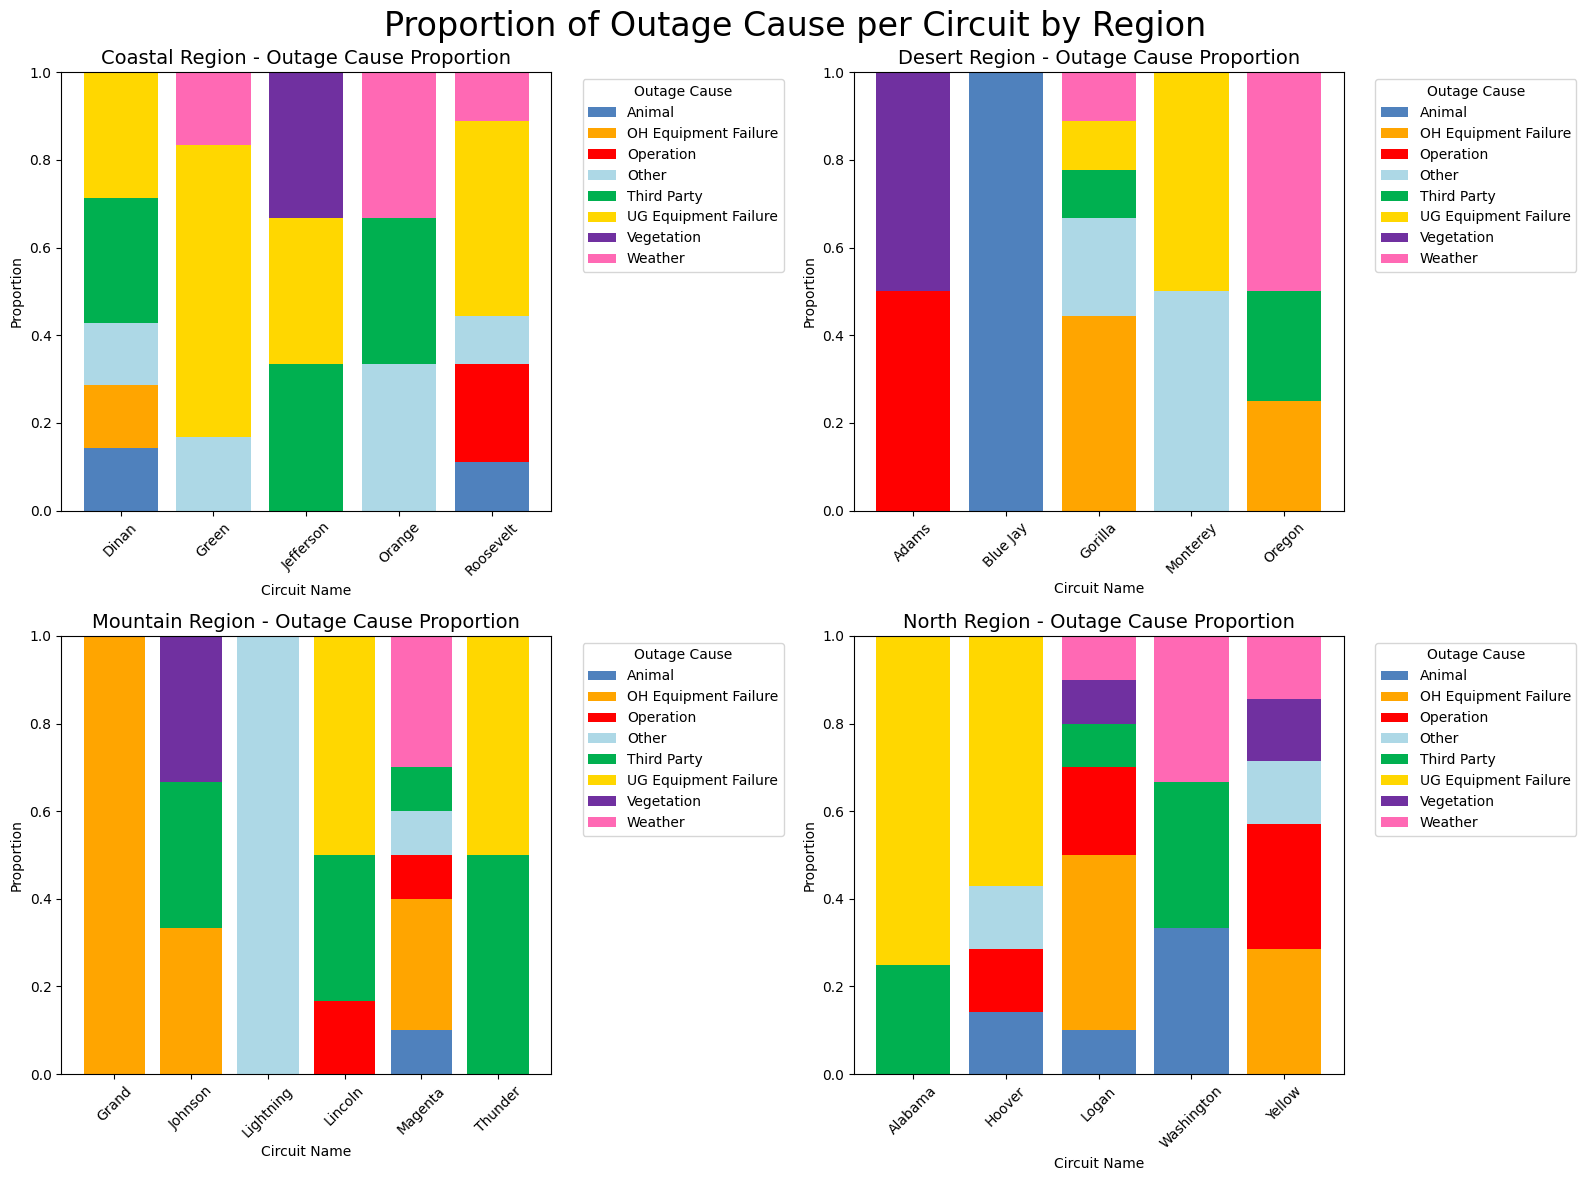

In [48]:
df_sorted = df.sort_values(by='circuit_name')

# Correct outage causes in the right order 
all_causes = [
    'Animal',
    'OH Equipment Failure',
    'Operation',
    'Other',
    'Third Party',
    'UG Equipment Failure',
    'Vegetation',
    'Weather'
]


cause_colors = {
    'Animal': '#4F81BD',             # Blue
    'OH Equipment Failure': '#FFA500', # Bright Orange
    'Operation': '#FF0000',           # Light Red
    'Other': '#ADD8E6',               # Light Blue
    'Third Party': '#00B050',         # Green
    'UG Equipment Failure': '#FFD700',# Bright Yellow (Goldish)
    'Vegetation': '#7030A0',          # Purple
    'Weather': '#FF69B4'              # Hot Pink / Bright Pink
}

# Define regions
regions = ['Coastal', 'Desert', 'Mountain', 'North']

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

# Stacked bar plots
for i, region in enumerate(regions):
    region_df = df_sorted[df_sorted['region'] == region]

    # Outage cause proportions per circuit
    cause_prop = (
        region_df.groupby(['circuit_name', 'outage_cause'])
        .size()
        .unstack(fill_value=0)
        .reindex(columns=all_causes)
    )
    cause_prop = cause_prop.div(cause_prop.sum(axis=1), axis=0)  # proportions

    # Draw each layer of the stack
    bottom = pd.Series([0] * len(cause_prop), index=cause_prop.index)
    for cause in all_causes:
        axs[i].bar(
            cause_prop.index,
            cause_prop[cause],
            bottom=bottom,
            color=cause_colors[cause],
            label=cause,
            width=0.8
        )
        bottom += cause_prop[cause]

    axs[i].set_title(f'{region} Region - Outage Cause Proportion', fontsize=14)
    axs[i].tick_params(rotation=45, axis='x')
    axs[i].set_xlabel('Circuit Name')
    axs[i].set_ylabel('Proportion')
    axs[i].legend(title='Outage Cause', bbox_to_anchor=(1.05, 1), loc='upper left')

# Overall title and layout
plt.suptitle('Proportion of Outage Cause per Circuit by Region', fontsize=24)
plt.tight_layout()
plt.show()

### SAIDI per Circuit by Region – 2024

The System Average Interruption Duration Index (SAIDI) measures the **average outage duration per customer** served by each circuit.

- Circuits like "Roosevelt" in Coastal and "Magenta" in Mountain show elevated SAIDI, suggesting not just frequent outages, but long ones.
- Several circuits in the Desert region have consistently low SAIDI, suggesting relatively fast service restoration.


/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/1910464916.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coastal, x='circuit_name', y='saidi_2024', palette='crest', ax=axs[0][0])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/1910464916.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=desert, x='circuit_name', y='saidi_2024', palette='rocket', ax=axs[0][1])
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/1910464916.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=

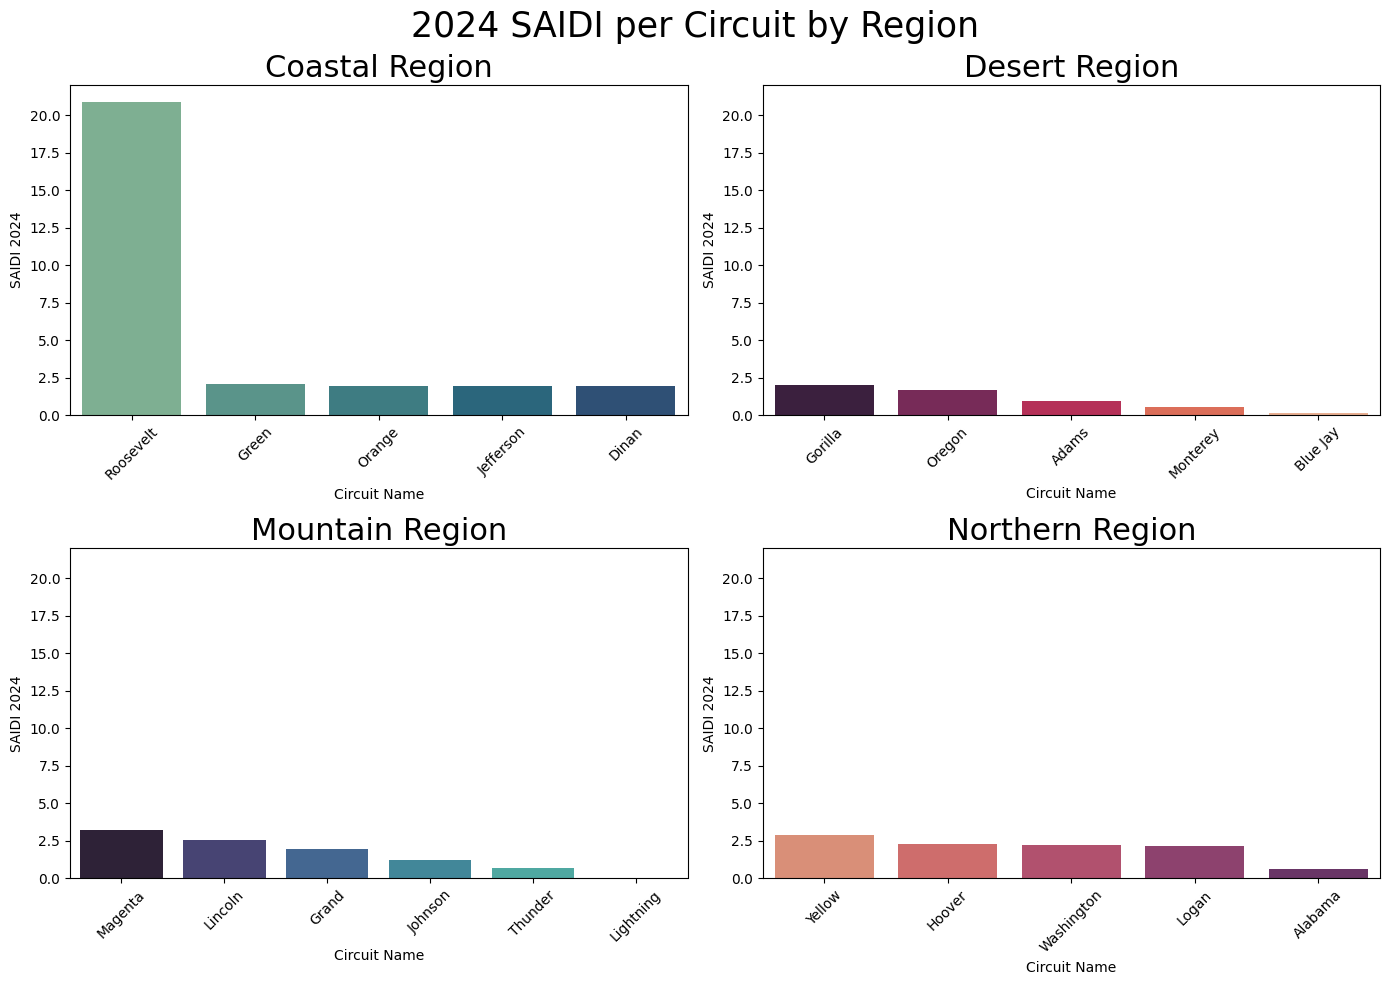

In [84]:
# Sort df by circuit name first (optional for ordering)
df_sorted = df.sort_values(by='circuit_name')

# Split and sort by SAIDI
coastal = df_sorted[df_sorted['region'] == 'Coastal'].sort_values(by='saidi_2024', ascending=False)
desert = df_sorted[df_sorted['region'] == 'Desert'].sort_values(by='saidi_2024', ascending=False)
mountain = df_sorted[df_sorted['region'] == 'Mountain'].sort_values(by='saidi_2024', ascending=False)
north = df_sorted[df_sorted['region'] == 'North'].sort_values(by='saidi_2024', ascending=False)

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Coastal - Crest
sns.barplot(data=coastal, x='circuit_name', y='saidi_2024', palette='crest', ax=axs[0][0])
axs[0][0].set_title('Coastal Region', fontsize=22)
axs[0][0].tick_params(rotation=45, axis='x')
axs[0][0].set_ylim(0, 22)
axs[0][0].set_xlabel("Circuit Name")
axs[0][0].set_ylabel("SAIDI 2024")

# Desert - Rocket
sns.barplot(data=desert, x='circuit_name', y='saidi_2024', palette='rocket', ax=axs[0][1])
axs[0][1].set_title('Desert Region', fontsize=22)
axs[0][1].tick_params(rotation=45, axis='x')
axs[0][1].set_ylim(0, 22)
axs[0][1].set_xlabel("Circuit Name")
axs[0][1].set_ylabel("SAIDI 2024")

# Mountain - Mako
sns.barplot(data=mountain, x='circuit_name', y='saidi_2024', palette='mako', ax=axs[1][0])
axs[1][0].set_title('Mountain Region', fontsize=22)
axs[1][0].tick_params(rotation=45, axis='x')
axs[1][0].set_ylim(0, 22)
axs[1][0].set_xlabel("Circuit Name")
axs[1][0].set_ylabel("SAIDI 2024")

# Northern - Flare
sns.barplot(data=north, x='circuit_name', y='saidi_2024', palette='flare', ax=axs[1][1])
axs[1][1].set_title('Northern Region', fontsize=22)
axs[1][1].tick_params(rotation=45, axis='x')
axs[1][1].set_ylim(0, 22)
axs[1][1].set_xlabel("Circuit Name")
axs[1][1].set_ylabel("SAIDI 2024")

# Final layout
plt.suptitle('2024 SAIDI per Circuit by Region', fontsize=25)
plt.tight_layout()
plt.show()


### SAIFI per Circuit by Region – 2024

The System Average Interruption Frequency Index (SAIFI) quantifies the **average number of outages per customer** in a given circuit.

- Coastal and Mountain regions have circuits like "Roosevelt" and "Magenta" with significantly elevated SAIFI values.
- Low-SAIFI circuits indicate better reliability in terms of fewer disruptions, even if the outages are long (which would then show in SAIDI).


/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/1070413583.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coastal, x='circuit_name', y='saifi_2024',
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/1070413583.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=desert, x='circuit_name', y='saifi_2024',
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_1319/1070413583.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mountain, x='circuit_name', y='saifi_2024',
/var/folders/b2/dv4

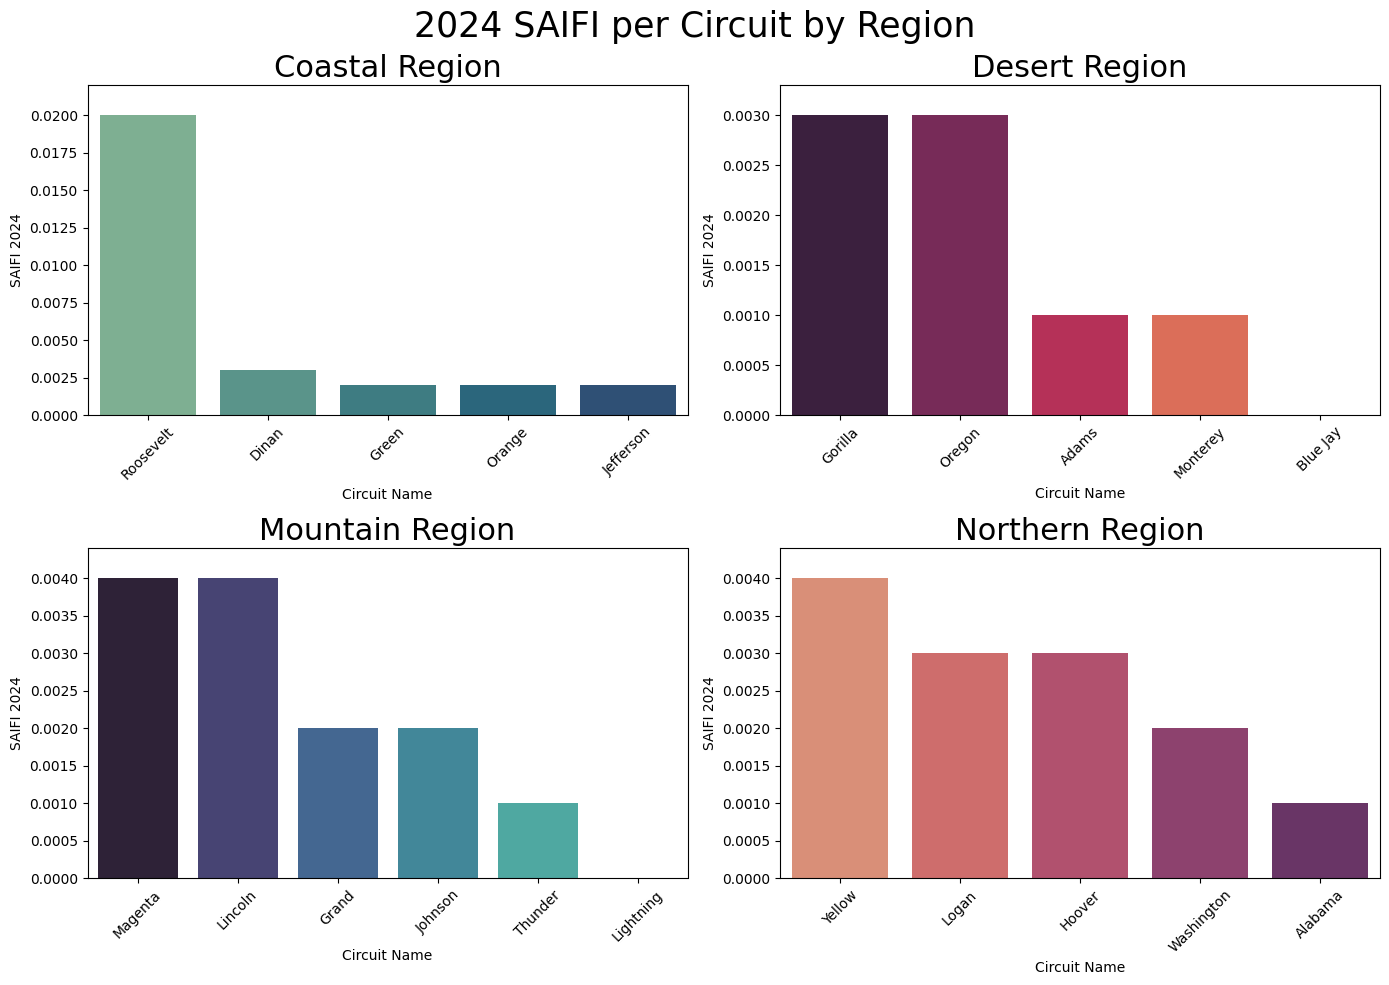

In [86]:
# Sort by circuit name (optional, just for consistency)
df_sorted = df.sort_values(by='circuit_name')

# Split and sort each region by SAIFI
coastal = df_sorted[df_sorted['region'] == 'Coastal'].sort_values(by='saifi_2024', ascending=False)
desert = df_sorted[df_sorted['region'] == 'Desert'].sort_values(by='saifi_2024', ascending=False)
mountain = df_sorted[df_sorted['region'] == 'Mountain'].sort_values(by='saifi_2024', ascending=False)
north = df_sorted[df_sorted['region'] == 'North'].sort_values(by='saifi_2024', ascending=False)

# Define palettes
region_palette = {
    'coastal': 'crest',
    'desert': 'rocket',
    'mountain': 'mako',
    'north': 'flare'
}

# Determine max SAIFI per region with 10% padding
max_coastal = coastal['saifi_2024'].max() * 1.1
max_desert = desert['saifi_2024'].max() * 1.1
max_mountain = mountain['saifi_2024'].max() * 1.1
max_north = north['saifi_2024'].max() * 1.1

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Coastal - Crest
sns.barplot(data=coastal, x='circuit_name', y='saifi_2024',
            palette=region_palette['coastal'], ax=axs[0][0])
axs[0][0].set_title('Coastal Region', fontsize=22)
axs[0][0].tick_params(rotation=45, axis='x')
axs[0][0].set_ylim(0, max_coastal)
axs[0][0].set_xlabel("Circuit Name")
axs[0][0].set_ylabel("SAIFI 2024")

# Desert - Rocket
sns.barplot(data=desert, x='circuit_name', y='saifi_2024',
            palette=region_palette['desert'], ax=axs[0][1])
axs[0][1].set_title('Desert Region', fontsize=22)
axs[0][1].tick_params(rotation=45, axis='x')
axs[0][1].set_ylim(0, max_desert)
axs[0][1].set_xlabel("Circuit Name")
axs[0][1].set_ylabel("SAIFI 2024")

# Mountain - Mako
sns.barplot(data=mountain, x='circuit_name', y='saifi_2024',
            palette=region_palette['mountain'], ax=axs[1][0])
axs[1][0].set_title('Mountain Region', fontsize=22)
axs[1][0].tick_params(rotation=45, axis='x')
axs[1][0].set_ylim(0, max_mountain)
axs[1][0].set_xlabel("Circuit Name")
axs[1][0].set_ylabel("SAIFI 2024")

# Northern - Flare
sns.barplot(data=north, x='circuit_name', y='saifi_2024',
            palette=region_palette['north'], ax=axs[1][1])
axs[1][1].set_title('Northern Region', fontsize=22)
axs[1][1].tick_params(rotation=45, axis='x')
axs[1][1].set_ylim(0, max_north)
axs[1][1].set_xlabel("Circuit Name")
axs[1][1].set_ylabel("SAIFI 2024")

# Final layout
plt.suptitle('2024 SAIFI per Circuit by Region', fontsize=25)
plt.tight_layout()
plt.show()


## Regional Circuit-Level Summary – Key Observations

- Mountain and Northern regions have circuits with both high outage frequency and high impact (CMI and SAIDI), indicating a need for prioritized investment.
- Outage causes vary widely by circuit, but equipment failures remain the dominant cause across most regions.
- Circuits with high SAIFI and SAIDI should be closely monitored as they represent both unreliable and prolonged outages.

These insights support more localized maintenance planning and circuit-specific reliability improvements.


# Seasonal Patterns

### Outage Causes by Season – 2024

This set of bar plots breaks down the frequency of outage causes by season for the year 2024. Each subplot shows the number of outages attributed to each cause during that season.

- **Spring** and **Summer** had the highest number of outages overall, with equipment failures (both overhead and underground) being the most dominant causes.
- **Winter** outages were more evenly distributed across multiple causes, including operations, weather, and underground equipment issues.
- **Fall** had fewer overall outages and a more balanced mix of causes, with no single dominant category.

This seasonal breakdown helps identify the timeframes in which certain causes are more prevalent. For example, summer outages may be linked to heat-related equipment stress, while spring may involve vegetation and storm-related factors.


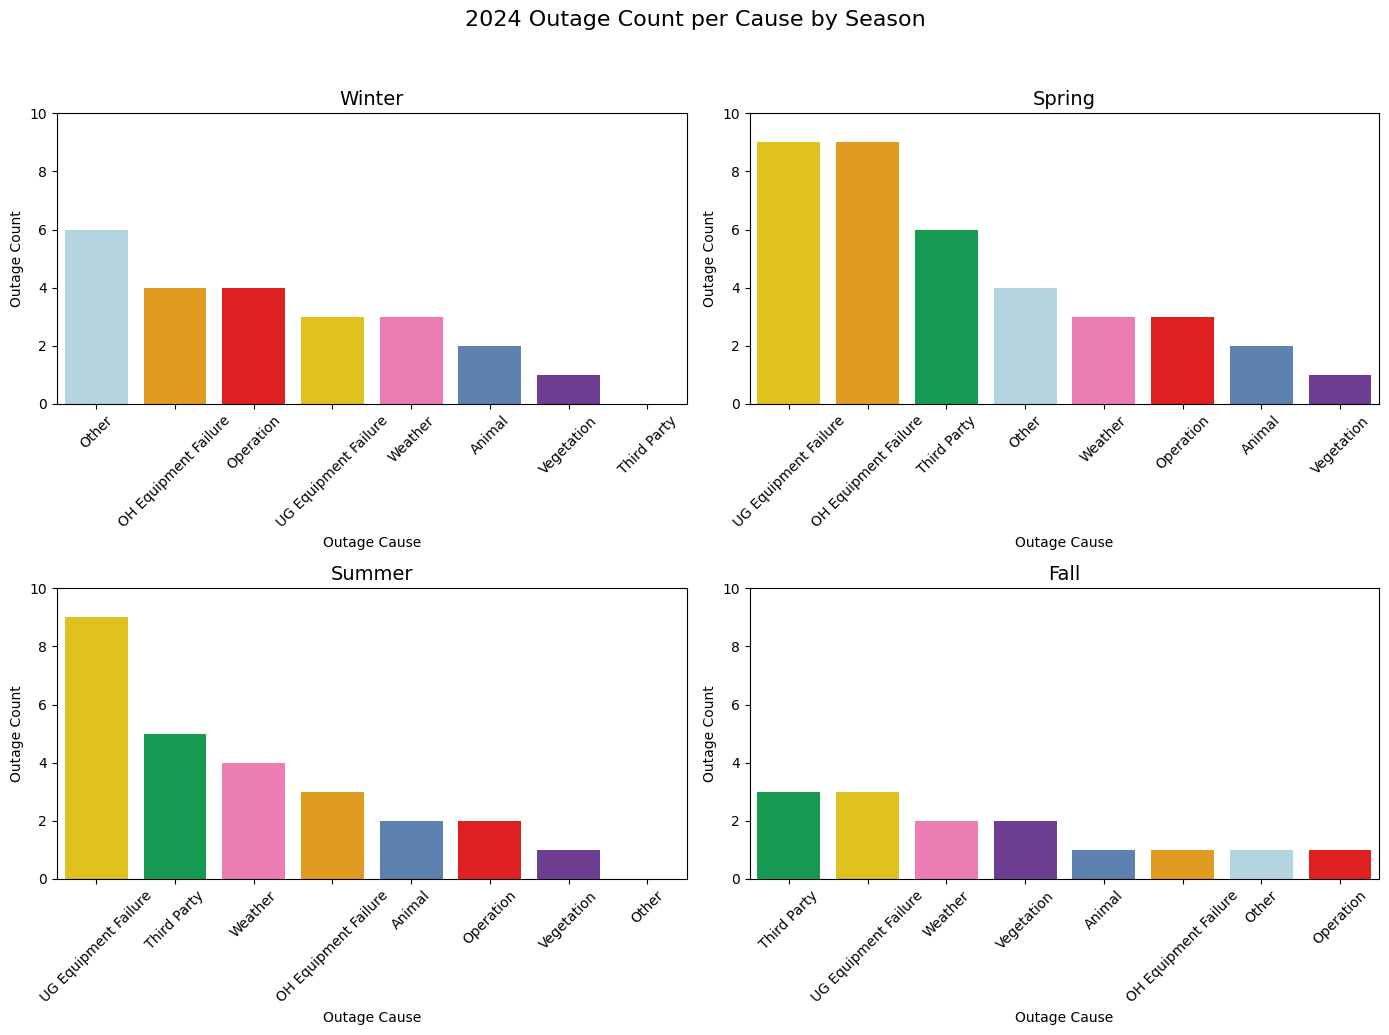

In [105]:
# Outage Cause Per Season
outage_cause_per_season = (
    df
    .groupby(['season', 'outage_cause'])
    .size()
    .reset_index(name='outage_count')
    #.sort_values(by=['season', 'outage_count'], ascending = False)
    # .reset_index(drop=True)
)

# max_count = outage_cause_per_season["outage_count"].max()
max_count = 10

# Then in each subplot, add:




palette = sns.color_palette("Set2")

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

winter = outage_cause_per_season[outage_cause_per_season["season"] == "Winter"]
spring =  outage_cause_per_season[outage_cause_per_season["season"] == "Spring"]
summer =  outage_cause_per_season[outage_cause_per_season["season"] == "Summer"]
fall =  outage_cause_per_season[outage_cause_per_season["season"] == "Fall"]

all_causes = sorted(df['outage_cause'])
def fill_missing_causes(df_season):
    return (
        df_season.set_index('outage_cause')
        .reindex(all_causes, fill_value=0)
        .reset_index()
    )
winter = fill_missing_causes(winter)
spring = fill_missing_causes(spring)
summer = fill_missing_causes(summer)
fall   = fill_missing_causes(fall)



sns.barplot(
    winter.sort_values(by='outage_count', ascending=False),
    x = 'outage_cause',
    y = 'outage_count',
    hue = 'outage_cause',
    palette = cause_colors,
    ax=axs[0,0]
)
axs[0][0].set_title('Winter', fontsize=14)
axs[0][0].tick_params(rotation = 45, axis = 'x')
axs[0, 0].set_ylim(0, max_count)
axs[0][0].set_xlabel("Outage Cause")
axs[0][0].set_ylabel("Outage Count")

sns.barplot(
    spring.sort_values(by='outage_count', ascending=False),
    x = 'outage_cause',
    y = 'outage_count',
    hue = 'outage_cause',
    palette = cause_colors,
    ax=axs[0,1]
)
axs[0][1].set_title('Spring', fontsize=14)
axs[0][1].tick_params(rotation = 45, axis = 'x')
axs[0, 1].set_ylim(0, max_count)
axs[0][1].set_xlabel("Outage Cause")
axs[0][1].set_ylabel("Outage Count")

sns.barplot(
    summer.sort_values(by='outage_count', ascending=False),
    x = 'outage_cause',
    y = 'outage_count',
    hue = 'outage_cause',
    palette = cause_colors,
    ax=axs[1,0]
)
axs[1][0].set_title('Summer', fontsize=14)
axs[1][0].tick_params(rotation = 45, axis = 'x')
axs[1, 0].set_ylim(0, max_count)
axs[1][0].set_xlabel("Outage Cause")
axs[1][0].set_ylabel("Outage Count")

sns.barplot(
    fall.sort_values(by='outage_count', ascending=False),
    x = 'outage_cause',
    y = 'outage_count',
    hue = 'outage_cause',
    palette = cause_colors,
    ax=axs[1,1]
)
axs[1][1].set_title('Fall', fontsize=14)
axs[1][1].tick_params(rotation = 45, axis = 'x')
axs[1, 1].set_ylim(0, max_count)
axs[1][1].set_xlabel("Outage Cause")
axs[1][1].set_ylabel("Outage Count")

plt.suptitle("2024 Outage Count per Cause by Season", fontsize=16, y=1.03) 
plt.tight_layout()